<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Implementation

In [71]:
#steepest descent.
def Steepest_descent(alpha,x_0,f,grad_f,tol_grad=10**(-4),max_iter=10**5,pr="False"):
    x_1=x_0-alpha*np.array(grad_f(x_0))
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    while(norm_grad>tol_grad and k<max_iter):
        k+=1
        x_1=x_0-alpha*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        return "F"
    else:
        if(pr=='True'):
            #plt.plot(F)
            plt.plot(G[0:-1])
        print("iterations: ",k)
        return (x_1)

In [52]:
def Newton(x_0,f,grad_f,Hess_f,tol_grad=10**(-4)):
    d=np.linalg.solve(Hess_f(x_0[0],x_0[1]),-np.array(grad_f(x_0[0],x_0[1])))
    x_1=x_0+d
    x_0=x_1
    k=1
    while(np.linalg.norm(grad_f(x_1[0],x_1[1]))>tol_grad):
        k+=1
        d=np.linalg.solve(Hess_f(x_0[0],x_0[1]),-np.array(grad_f(x_0[0],x_0[1])))
        x_1=x_0+d
        x_0=x_1
    print(k,"iter")
    return (x_1)

In [ ]:
#Exercise 2. Rosembrok's function.---------------------------------------------

In [53]:
def Rosembrok(X):#X es un vector.
    suma=0
    for i in range(len(X)-1):
        suma+=100*((X[i+1]-X[i]**2)**2)+(1-X[i])**2
    return (suma)
def Rosembrok_grad(X):
    D=[]
    D.append(-400*(X[0]*(X[1]-X[0]**2))-2*(1-X[0]))
    for i in range(1,len(X)-1):
        D.append(-400*(X[i]*(X[i+1]-X[i]**2))+200*(X[i]-X[i-1]**2)-2*(1-X[i]))
    D.append(200*(X[-1]-X[-2]**2))
    return D
def Rosembrok_Hessian(X):
    M=[]
    #Renglon 1
    D=np.zeros(len(X))
    D[0]=(-400*(X[1]-X[0]**2)+800*(X[0]**2)+2)
    D[1]=-400*(X[1])
    M.append(D)
    #Renglon 2<i<n
    for i in range(1,len(X)-1):
        D=np.zeros(len(X))
        D[i]=(-400*(X[i+1]-X[i]**2)+800*(X[i]**2)+202)
        D[i-1]=-400*X[i-1]
        D[i+1]=-400*X[i]
        M.append(D)
    #Renglon n
    D=np.zeros(len(X))
    D[-2]=-400*X[-2]
    D[-1]=200
    M.append(D)
    return M

Initial approximation:  [-1.2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1.2, 1]
iterations:  16522
local minimum pproximation:  [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998725  0.99999365  0.99999683
  0.99999842  0.99999921  0.99999961  0.9999998   0.9999999   0.99999995
  0.99999998  0.99999999  0.99999999  1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.        

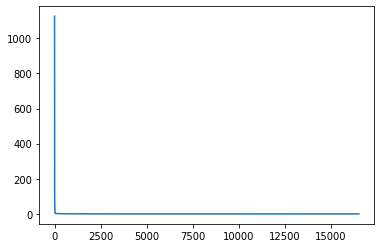

In [74]:
#Grafica
x_0=[]
x_0.append(-1.2)
n=100
for i in range(1,n-2):
    x_0.append(1)
x_0.append(-1.2)
x_0.append(1)
#print("local minimum pproximation: ",Steepest_descent(alpha=0.001,x_0=x_0,f=Rosembrok,grad_f=Rosembrok_grad,pr='True'))#Si ploteo G[200:-1] se ve mas bonito.
#print("local minimum pproximation: ",Steepest_descent(alpha=0.001,x_0=[-1.2,1],f=Rosembrok,grad_f=Rosembrok_grad,pr='True'))#Si ploteo G[200:-1] se ve mas bonito.

In [ ]:
#Exercise 2. Wood's function.---------------------------------------------

In [ ]:
def Wood(X):
    return (100*(X[0]**2-X[1])**2+(X[0]-1)**2+(X[2]-1)**2+90*(X[2]**2-X[3])**2+10.1*((X[1]-1)**2+(X[3]-1)**2)+19.8*(X[1]-1)*(X[3]-1))
def Wood_grad(X):
    G=[]
    G.append(400*X[0]*(X[0]**2-X[1])+2*(X[0]-1))
    G.append(-200*(X[0]**2-X[1])+20.2*(X[1]-1)+19.8*(X[3]-1))
    G.append(2*(X[2]-1)+360*(X[2]**2-X[3])*X[2])
    G.append(-180*(X[2]**2-X[3])+20.2*(X[3]-1)+19.8*(X[1]-1))
    return G
def Wood_Hessian(X):
    D1=[2+400*(X[0]**2-1)+800*X[0]**2,-400*X[0],0,0]
    D2=[-400*X[0],220.2,0,19.8]
    D3=[0,0,2+720*(X[2]**2)+360*(X[2]-X[3]),-360*X[2]]
    D4=[0,19.8,-360*X[2],200.2]
    return [D1,D2,D3,D4]


Initial approximation:  [-3, -1, -3, -1]
iterations:  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scal

array([inf, inf, inf, inf])

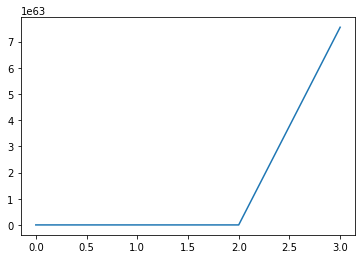

In [75]:
Steepest_descent(alpha=0.001,x_0=[-3,-1,-3,-1],f=Wood,grad_f=Wood_grad,pr='True')#Si ploteo G[200:-1] se ve mas bonito.

In [ ]:
#Exercise 3.----------------------------------------

In [83]:
l=1.5
s=0.5
x=np.zeros(128)
Y=gen_y(s=s,n=128)
def f_normal(X,l=l,Y=Y):
    n=len(X)
    suma=0
    for i in range(n-1):
        suma+=(X[i]-Y[-1])**2+l*(X[i+1]-X[i])**2
    suma+=(X[-1]-Y[-1])**2
    return suma
def gen_y(s,n,pr='False'):
    etha=np.random.normal(0,s,size=n)
    t=[]
    y=[]
    for i in range(n-1):
        t.append(((2/(n-1))*(i)-1))
        y.append((t[-1]**2+etha[i]))
    t.append(1)
    y.append((t[-1]**2+etha[i]))
    if(pr=='True'):
        print(t)
        print(y)
        plt.plot(t,y)
    return (y)
def f_normal_grad(X,l=l,Y=Y):
    D=[]
    D.append(2*(X[0]-Y[0])-2*l*(X[1]-X[0]))
    for i in range(1,len(X)-1):
        D.append(2*(X[i]-Y[i])-2*l*(X[i+1]-X[i])+2*l*(X[i]-X[i-1]))
    D.append(2*(X[-1]-Y[-1])-2*l*(X[-1]-X[-2]))
    return D
def f_normal_Hessian(X,l=l,Y=Y):##
    M=[]
    #Renglon 1
    D=np.zeros(len(X))
    D[0]=2+2*l
    D[1]=-2*l
    M.append(D)
    #Renglon 2<i<n
    for i in range(1,len(X)-1):
        D=np.zeros(len(X))
        D[i]=2
        D[i-1]=-2*l
        D[i+1]=-2*l
        M.append(D)
    #Renglon n
    D=np.zeros(len(X))
    D[-2]=-2*l
    D[-1]=2+2*l
    M.append(D)
    return M

Initial approximation:  [-1.2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1.2, 1]
iterations:  20615


array([ 1.13059255e+00,  1.34833756e+00,  1.24978741e+00,  1.23959341e+00,
        1.16944508e+00,  1.07793752e+00,  9.51362249e-01,  1.04132035e+00,
        1.26427340e+00,  1.06887018e+00,  8.60996020e-01,  7.49992839e-01,
        5.62444999e-01,  5.52709117e-01,  5.24844513e-01,  3.42148632e-01,
        6.16664980e-01,  5.67860460e-01,  6.79417820e-01,  7.99698189e-01,
        7.36037831e-01,  6.97538444e-01,  7.01534370e-01,  4.86115060e-01,
        3.70840947e-01,  2.78716409e-01,  2.61465670e-01,  1.60642432e-01,
        3.26099272e-01,  5.45779611e-01,  5.87840100e-01,  5.61719459e-01,
        4.59080597e-01,  4.15960731e-01,  1.39817614e-01,  2.38780987e-01,
        2.36653752e-01,  3.81052444e-01,  7.14231575e-03, -2.87863889e-02,
        1.74746121e-01,  2.41862562e-01, -1.00559272e-01, -6.88546361e-02,
       -4.49325273e-02,  4.73832607e-02,  2.05433883e-01, -2.18425442e-03,
        8.70058781e-02, -1.73082225e-01, -4.23259360e-01, -3.45414382e-01,
        8.07705562e-02,  

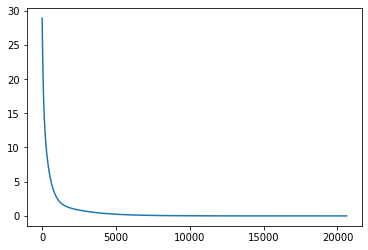

In [84]:
Steepest_descent(alpha=0.001,x_0=x_0,f=f_normal,grad_f=f_normal_grad,pr='True')#Si ploteo G[200:-1] se ve mas bonito.

In [ ]:
f_normal_Hessian([1,1,1,1,1,1,1,1,1,1,1,1,1],1.5,gen_y(0.01,13))

[array([ 5., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-3.,  2., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0., -3.,  2., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0., -3.,  2., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., -3.,  2., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0., -3.,  2., -3.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0., -3.,  2., -3.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0., -3.,  2., -3.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  2., -3.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  2., -3.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  2., -3.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  2., -3.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  5.])]

In [ ]:
Wood_Hessian([1,1,1,1])

[[802, -400, 0, 0],
 [-400, 220.2, 0, 19.8],
 [0, 0, 722, -360],
 [0, 19.8, -360, 200.2]]

In [ ]:
print(Steepest_descent(alpha=0.001,x_0=[1.5,1.6],f=Rosembrok,grad_f=Rosembrok_grad))

20832 numero de iteraciones
[1.0001118  1.00022405]


In [ ]:
def Hess_f(x_1,x_2):
    return ([[-400*(x_2-x_1**2)+800*x_1**2+2,-400*x_1],[400*x_1,200]])

In [ ]:
Newton(x_0=[1.57,1.6],f=f,grad_f=grad_f,Hess_f=Hess_f)

7965 iter


array([1.00009997, 1.00020046])